In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline
plt.rcParams.update({'font.size': 22, 'lines.linewidth': 5})
plt.rcParams['lines.color'] =  '#0bb48b'

## Pull in and Clean Data

---

In [4]:
data_2000 = pd.read_csv('SFLP_performance_2000.csv', dtype=
    {
        "mdate": object,
        "loan_id": object,
        "date": object,
        "current_loan_balance": float,
        "current_deliquency_status": object,
        "loan_age": int,
        "zero_balance_flag": object,
        "zero_balance_date": object,
        "current_interest_rate": float,
        "ltv": float,
        "zero_balance_removal_balance": float,
        "mortgagerate_30yr": float
    },
)

data_2000.zero_balance_flag = pd.to_numeric(data_2000.zero_balance_flag.fillna(0))
data_2000.zero_balance_date = data_2000.zero_balance_date.fillna('')
data_2000.zero_balance_removal_balance = pd.to_numeric(data_2000.zero_balance_removal_balance.fillna(0))
data_2000.ltv = pd.to_numeric(data_2000.ltv.fillna(0))

for c in data_2000.columns:
    print("\"" + str(c) + "\"" + ": " + str(data_2000[c].dtype) + ",")

data_2000

"mdate": object,
"loan_id": object,
"date": object,
"current_loan_balance": float64,
"current_deliquency_status": object,
"loan_age": int64,
"zero_balance_flag": int64,
"zero_balance_date": object,
"current_interest_rate": float64,
"ltv": float64,
"zero_balance_removal_balance": float64,
"mortgagerate_30yr": float64,


,mdate,loan_id,date,current_loan_balance,current_deliquency_status,loan_age,zero_balance_flag,zero_balance_date,current_interest_rate,ltv,zero_balance_removal_balance,mortgagerate_30yr
0,2000m2,F100Q1044432,200002,179000.00,0,0,0,,8.375,0.0,0.0,8.33
1,2000m2,F100Q1020029,200002,101000.00,0,0,0,,8.250,0.0,0.0,8.33
2,2000m2,F100Q1010936,200002,113000.00,0,0,0,,8.125,0.0,0.0,8.33
3,2000m2,F100Q1055505,200002,80000.00,0,0,0,,8.375,0.0,0.0,8.33
4,2000m2,F100Q1004356,200002,117000.00,0,0,0,,8.625,0.0,0.0,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...
1228485,2019m6,F100Q3226004,201906,35261.36,0,225,0,,6.125,0.0,0.0,3.80
1228486,2019m6,F100Q4133995,201906,129468.80,5,223,0,,6.625,54.6,0.0,3.80
1228487,2019m6,F100Q3227166,201906,34416.58,0,224,0,,5.250,7.6,0.0,3.80
1228488,2019m6,F100Q1124423,201906,224582.60,9,230,0,,4.375,56.1,0.0,3.80


In [9]:
data_2000.zero_balance_flag.value_counts()

0     1181679
1       46575
6         136
2          55
3          35
15         10
Name: zero_balance_flag, dtype: int64

---

## Calculate rate gap

---

- If positive: refi
- If negative: don't refi

In [29]:
# create new column for rate gap
data_2000['rategap'] = data_2000['current_interest_rate'] - data_2000['mortgagerate_30yr']

# count rate gap for each loan
rategap_count_2000 = defaultdict(lambda: {'num_loans': 0, 'num_prepay': 0}, {})

for ind, row in data_2000.iterrows():
    # rounded rategap
    rategap_2000 = np.round(row['rategap'], 1)

    # count number of loans for each rategap
    rategap_count_2000[rategap_2000]['num_loans'] += 1

    # count number of loans that prepaid at each rategap
    if row['zero_balance_flag']:
        rategap_count_2000[rategap_2000]['num_prepay'] += 1



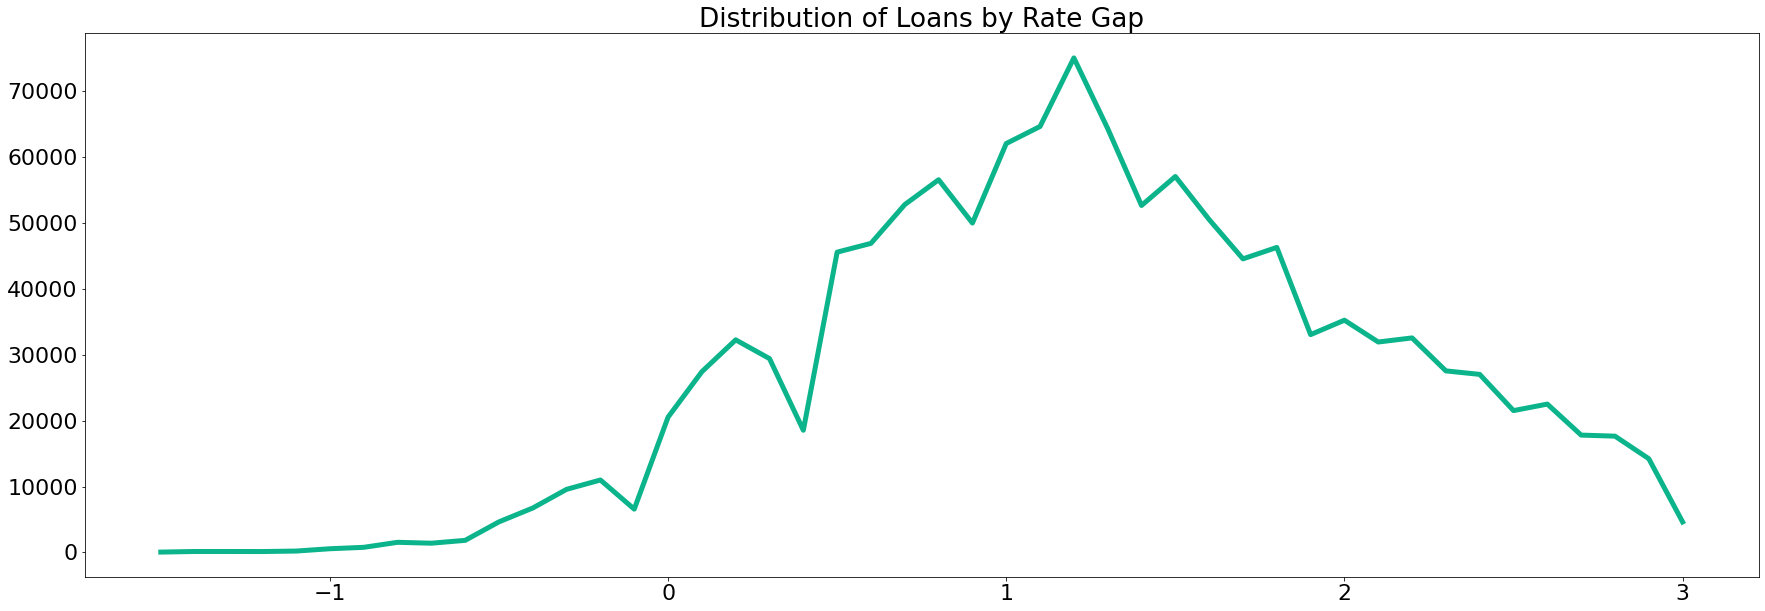

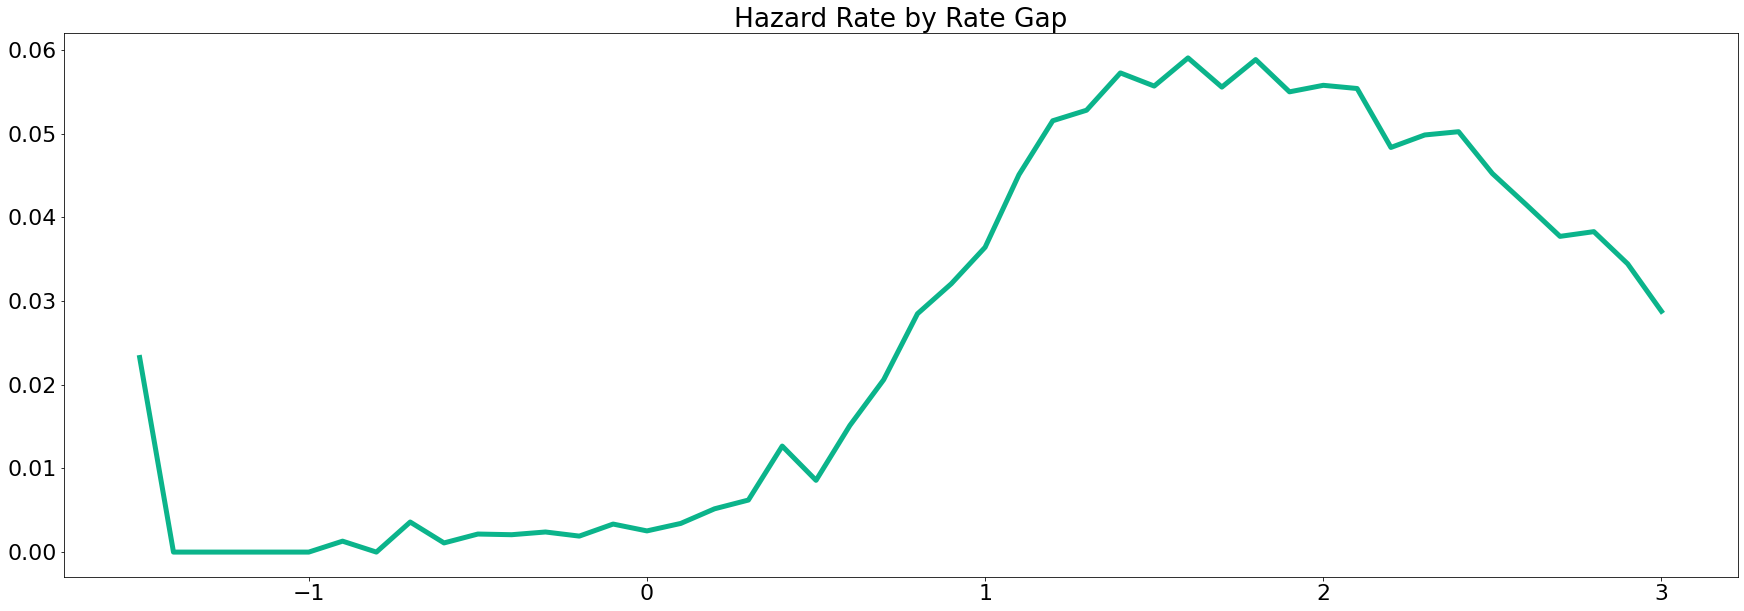

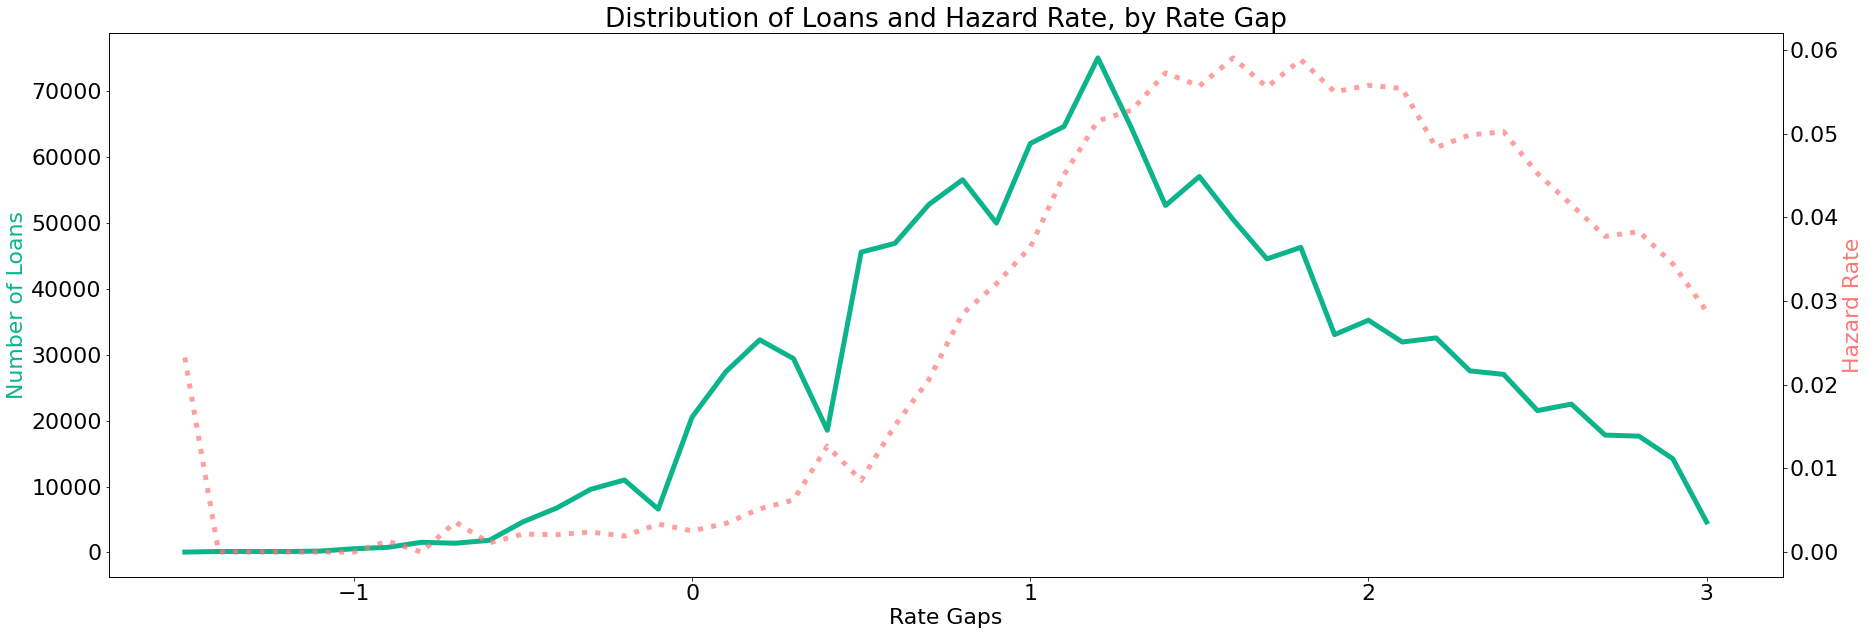

In [30]:
rategaps = list(rategap_count_2000.keys())
rategaps.sort()
rategap_loan_count = []
rategap_prepay_count = []
for rategap in rategaps:
    rategap_loan_count.append(rategap_count_2000[rategap]['num_loans'])
    rategap_prepay_count.append(rategap_count_2000[rategap]['num_prepay']/rategap_count_2000[rategap]['num_loans'])

plt.figure(figsize=(30,10))
plt.plot(rategaps, rategap_loan_count, c='#0bb48b')
plt.title("Distribution of Loans by Rate Gap")
plt.show()

plt.figure(figsize=(30,10))
plt.plot(rategaps, rategap_prepay_count, c='#0bb48b')
plt.title("Hazard Rate by Rate Gap")
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(30,10)
ax2 = ax1.twinx()
ax1.plot(rategaps, rategap_loan_count, c='#0bb48b')
ax2.plot(rategaps, rategap_prepay_count, c='#ff7777', linestyle = ":", alpha = 0.7)

ax1.set_xlabel('Rate Gaps')
ax1.set_ylabel('Number of Loans', c='#0bb48b')
ax2.set_ylabel('Hazard Rate', c='#ff7777')

plt.title("Distribution of Loans and Hazard Rate, by Rate Gap")
plt.show()

---

In [5]:
date_2007 = pd.read_csv('SFLP_performance_2007.csv', dtype=
    {
        "mdate": object,
        "loan_id": object,
        "date": object,
        "current_loan_balance": float,
        "current_deliquency_status": object,
        "loan_age": int,
        "zero_balance_flag": object,
        "zero_balance_date": object,
        "current_interest_rate": float,
        "ltv": float,
        "zero_balance_removal_balance": float,
        "mortgagerate_30yr": float
    },
)

date_2007.zero_balance_flag = pd.to_numeric(date_2007.zero_balance_flag.fillna(0))
date_2007.zero_balance_date = date_2007.zero_balance_date.fillna('')
date_2007.zero_balance_removal_balance = pd.to_numeric(date_2007.zero_balance_removal_balance.fillna(0))
date_2007.ltv = pd.to_numeric(date_2007.ltv.fillna(0))

for c in date_2007.columns:
    print("\"" + str(c) + "\"" + ": " + str(date_2007[c].dtype) + ",")

date_2007

"mdate": object,
"loan_id": object,
"date": object,
"current_loan_balance": float64,
"current_deliquency_status": object,
"loan_age": int64,
"zero_balance_flag": int64,
"zero_balance_date": object,
"current_interest_rate": float64,
"ltv": float64,
"zero_balance_removal_balance": float64,
"mortgagerate_30yr": float64,


,mdate,loan_id,date,current_loan_balance,current_deliquency_status,loan_age,zero_balance_flag,zero_balance_date,current_interest_rate,ltv,zero_balance_removal_balance,mortgagerate_30yr
0,2007m2,F107Q1000020,200702,205000.00,0,0,0,,6.75,0.0,0.0,6.29
1,2007m3,F107Q1000020,200703,205000.00,0,1,0,,6.75,0.0,0.0,6.16
2,2007m4,F107Q1000020,200704,205000.00,0,2,0,,6.75,0.0,0.0,6.18
3,2007m5,F107Q1000020,200705,204000.00,0,3,0,,6.75,0.0,0.0,6.26
4,2007m6,F107Q1000020,200706,204000.00,0,4,0,,6.75,0.0,0.0,6.66
...,...,...,...,...,...,...,...,...,...,...,...,...
2662950,2019m8,F107Q4292145,201908,68937.73,0,139,0,,6.50,60.2,0.0,3.62
2662951,2019m9,F107Q4292145,201909,68773.88,0,140,0,,6.50,60.9,0.0,3.61
2662952,2019m10,F107Q4292145,201910,68609.15,0,141,0,,6.50,60.7,0.0,3.69
2662953,2019m11,F107Q4292145,201911,68443.52,0,142,0,,6.50,61.6,0.0,3.70


---

## Calculate rate gap

---

- If positive: refi
- If negative: don't refi

In [31]:
# create new column for rate gap
date_2007['rategap'] = date_2007['current_interest_rate'] - date_2007['mortgagerate_30yr']

# count rate gap for each loan
rategap_count = defaultdict(lambda: {'num_loans': 0, 'num_prepay': 0}, {})

for ind, row in date_2007.iterrows():
    # rounded rategap
    rategap = np.round(row['rategap'], 1)

    # count number of loans for each rategap
    rategap_count[rategap]['num_loans'] += 1

    # count number of loans that prepaid at each rategap
    if row['zero_balance_flag']:
        rategap_count[rategap]['num_prepay'] += 1



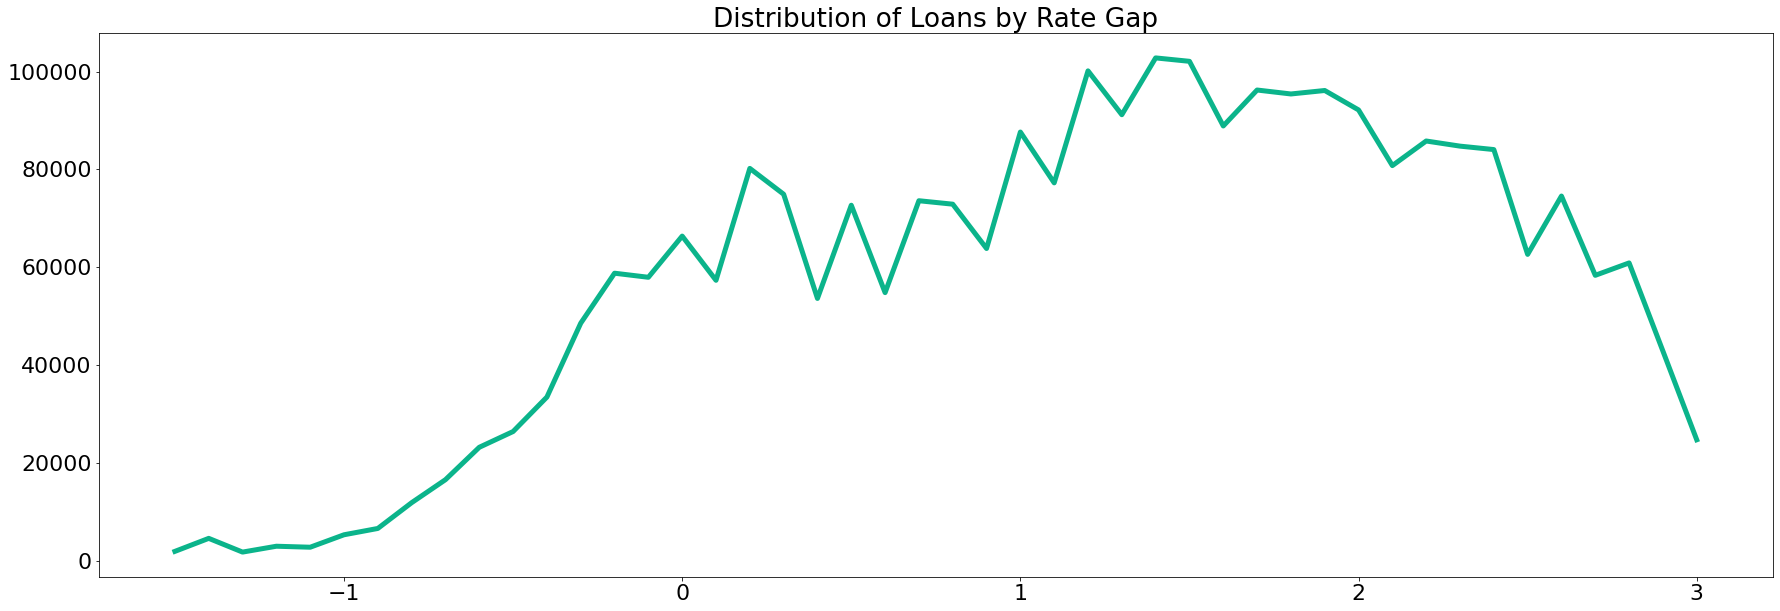

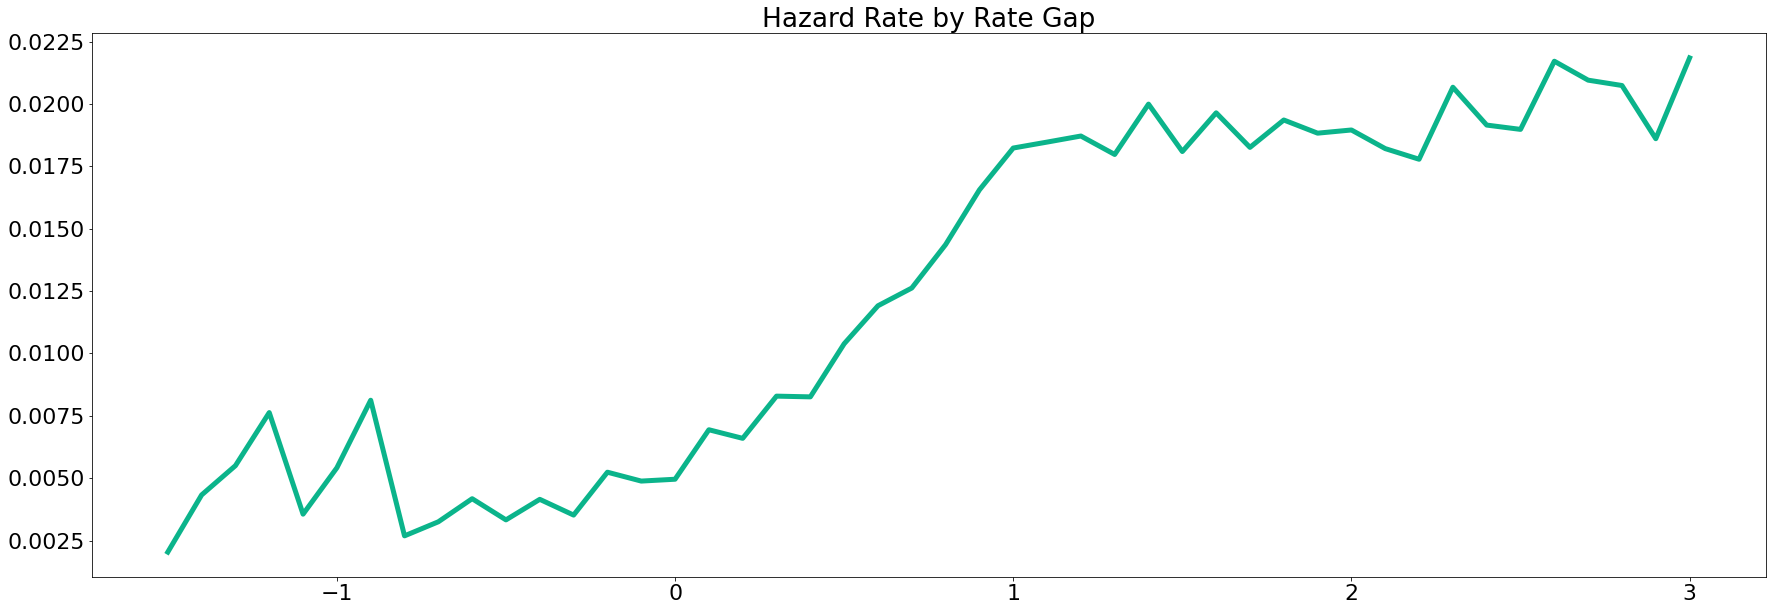

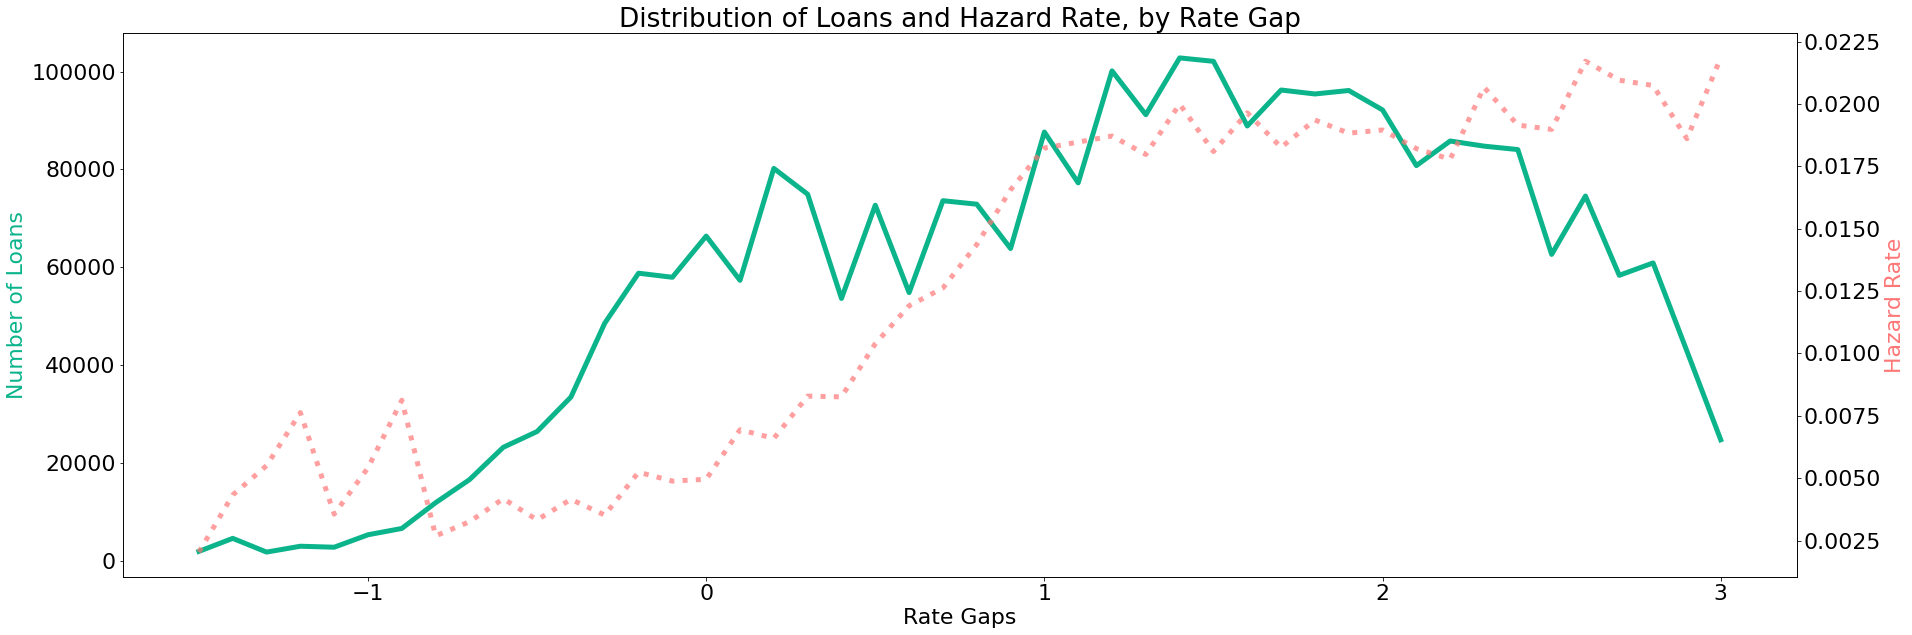

In [32]:
rategaps = list(rategap_count.keys())
rategaps.sort()
rategap_loan_count = []
rategap_prepay_count = []
for rategap in rategaps:
    rategap_loan_count.append(rategap_count[rategap]['num_loans'])
    rategap_prepay_count.append(rategap_count[rategap]['num_prepay']/rategap_count[rategap]['num_loans'])

plt.figure(figsize=(30,10))
plt.plot(rategaps, rategap_loan_count, c='#0bb48b')
plt.title("Distribution of Loans by Rate Gap")
plt.show()

plt.figure(figsize=(30,10))
plt.plot(rategaps, rategap_prepay_count, c='#0bb48b')
plt.title("Hazard Rate by Rate Gap")
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(30,10)
ax2 = ax1.twinx()
ax1.plot(rategaps, rategap_loan_count, c='#0bb48b')
ax2.plot(rategaps, rategap_prepay_count, c='#ff7777', linestyle = ":", alpha = 0.7)

ax1.set_xlabel('Rate Gaps')
ax1.set_ylabel('Number of Loans', c='#0bb48b')
ax2.set_ylabel('Hazard Rate', c='#ff7777')

plt.title("Distribution of Loans and Hazard Rate, by Rate Gap")
plt.show()

---